In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data_path = "../data/processed/clean_study_data.csv"
df = pd.read_csv(data_path)

print("Dataset loaded successfully!")
print(f"Number of rows: {df.shape[0]}, Number of columns: {df.shape[1]}")
df.head() 

Dataset loaded successfully!
Number of rows: 100, Number of columns: 7


,study_hours,sleep_hours,revision_freq,mock_score,screen_time,break_time,exam_score
0,4,8,0,38,5,2,43
1,3,6,0,46,5,2,39
2,7,7,4,85,7,0,82
3,5,5,5,38,5,0,51
4,2,9,2,77,5,0,56


In [3]:
print("\nData Info:")
print(df.info())

print("\nDescriptive Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check for duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   study_hours    100 non-null    int64
 1   sleep_hours    100 non-null    int64
 2   revision_freq  100 non-null    int64
 3   mock_score     100 non-null    int64
 4   screen_time    100 non-null    int64
 5   break_time     100 non-null    int64
 6   exam_score     100 non-null    int64
dtypes: int64(7)
memory usage: 5.6 KB
None

Descriptive Statistics:
       study_hours  sleep_hours  revision_freq  mock_score  screen_time  \
count   100.000000   100.000000     100.000000   100.00000   100.000000   
mean      4.450000     6.440000       2.610000    59.96000     3.820000   
std       2.129044     1.683671       1.740167    20.72617     1.887653   
min       1.000000     4.000000       0.000000    20.00000     1.000000   
25%       3.000000     5.000000       1.000000    43.75000     2

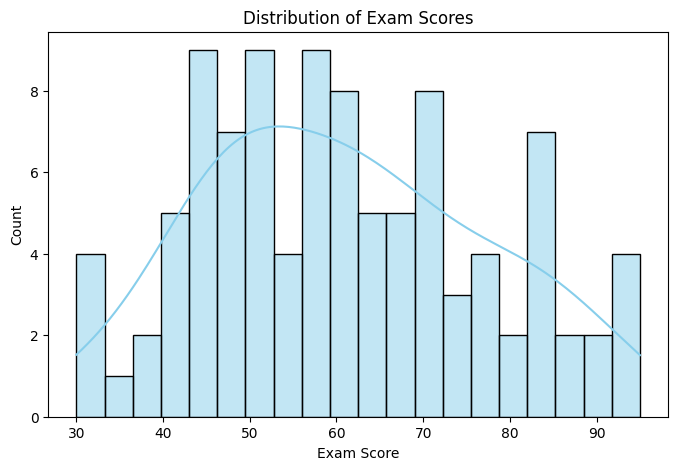

In [4]:
plt.figure(figsize=(8,5))
sns.histplot(df['exam_score'], kde=True, color='skyblue', bins=20)
plt.title("Distribution of Exam Scores")
plt.xlabel("Exam Score")
plt.ylabel("Count")
plt.show()


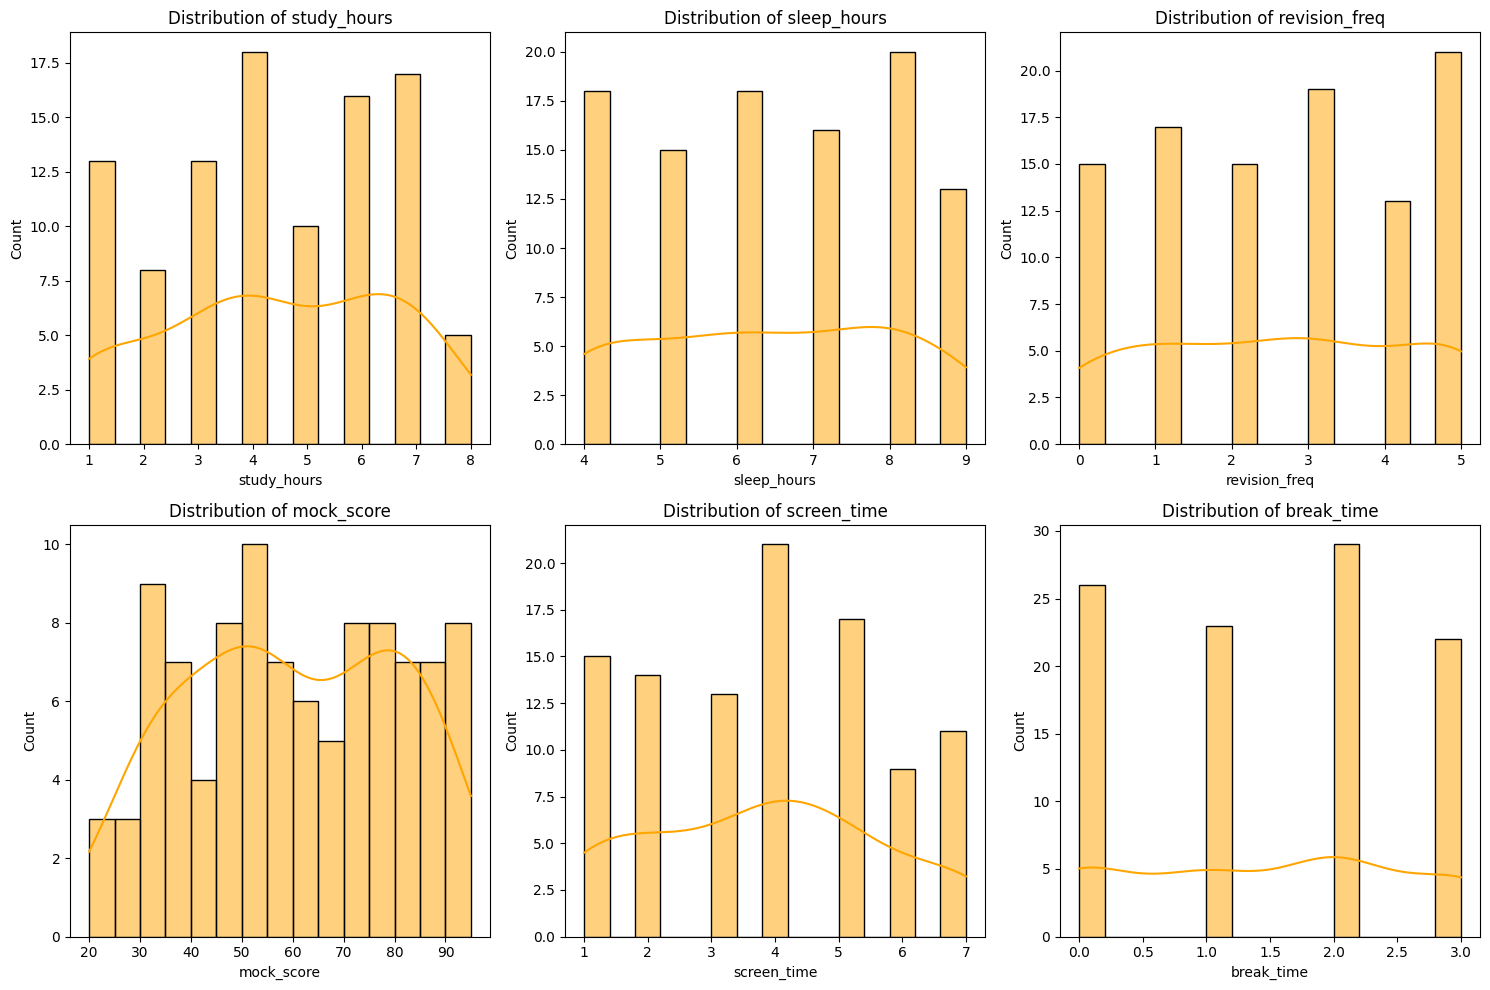

In [5]:
features = ['study_hours','sleep_hours','revision_freq','mock_score','screen_time','break_time']

plt.figure(figsize=(15,10))
for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sns.histplot(df[col], kde=True, color='orange', bins=15)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


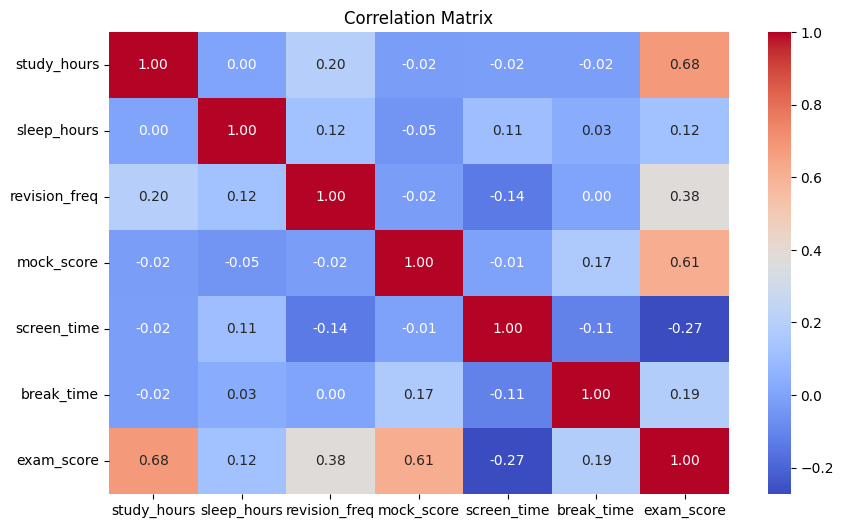

In [6]:
plt.figure(figsize=(10,6))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

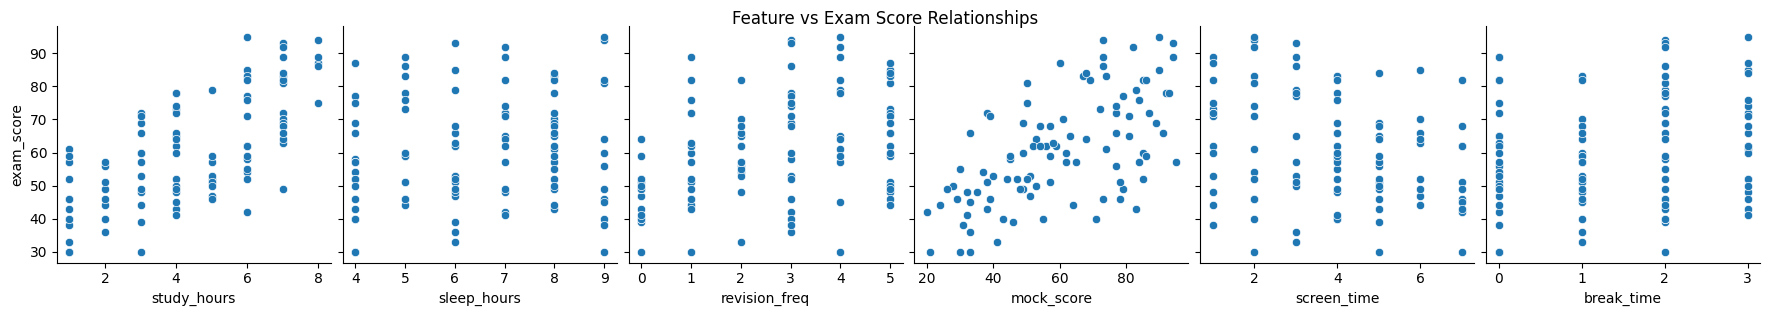

In [7]:
sns.pairplot(df, x_vars=features, y_vars='exam_score', height=3, kind='scatter')
plt.suptitle("Feature vs Exam Score Relationships", y=1.02)
plt.show()

In [8]:
print("\nTop Correlated Features with Exam Score:")
print(corr['exam_score'].sort_values(ascending=False))


Top Correlated Features with Exam Score:
exam_score       1.000000
study_hours      0.676824
mock_score       0.612774
revision_freq    0.377959
break_time       0.187749
sleep_hours      0.120819
screen_time     -0.273169
Name: exam_score, dtype: float64
